# Проектная работа по модулю “Математика и статистика в Python”
### 1.Загрузить файл hr.csv.


In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
import numpy as np


from pylab import rcParams

In [2]:
url='hr.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
depts = data['sales'].unique()
depts

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
# Create dummy columns for salary
data = data.join(pd.get_dummies(data['salary']))

In [9]:
# Создадим два дата-фрейма для работающих и уволившихся
working = data[data['left']==0]
left = data[data['left']==1]

### 2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.082472,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.275092,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.Рассчитать и визуализировать корреляционную матрицу для переменных.


In [11]:

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


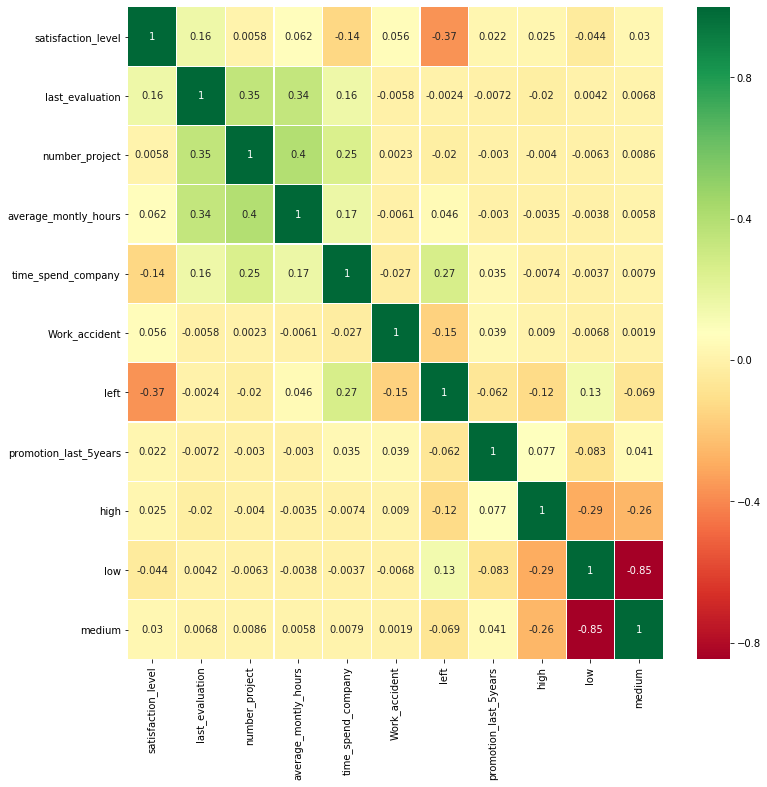

In [12]:
sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=0.2, cmap='RdYlGn' )
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Сильных корреляций нет. Похоже, есть обратная взаимосвязь между уровнем удовлетворенности и увольнением (логично) и количеством проектов и временем на работе. Также, возможно, есть взаимосвязь между последней оценкой и временем на работе. 

Для работающих и уволившихся:

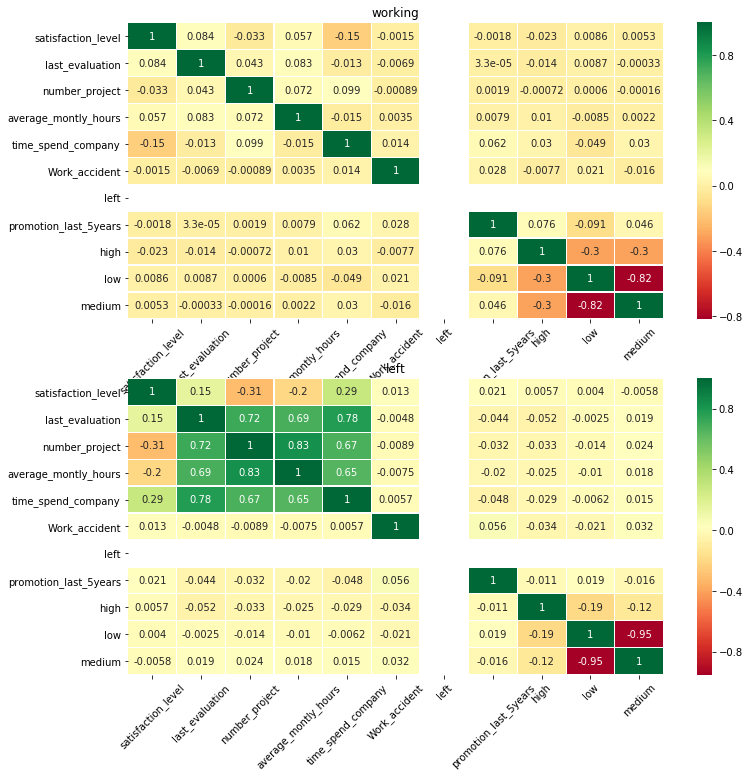

In [13]:
rcParams['figure.figsize'] = 20,30

plt.subplot(2, 1, 1)
sns.heatmap(working.corr(method='spearman'), annot=True, linewidths=0.2, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('working')

plt.subplot(2, 1, 2)
sns.heatmap(left.corr(method='spearman'), annot=True, linewidths=0.2, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('left')

plt.show()

У уволившихся наблюдается корреляция между последней оценкой, количеством проектов, количеством часов и общим временем работы в компании. У работающих параметры практически не связаны. Первая и самая простая гипотеза об увольнении - надоело и устал))

In [16]:
# Let's try to normalize. Just for play - it's easier to see structures
norm_df = pd.DataFrame()
norm_df['left'] = data['left']
norm_df['last_evaluation'] = (data['last_evaluation'] - data['last_evaluation'].mean()) / (
    data['last_evaluation'].max() - data['last_evaluation'].min())
norm_df['number_project'] = (data['number_project'] - data['number_project'].mean()) / (
    data['number_project'].max() - data['number_project'].min())
norm_df['average_montly_hours'] = (data['average_montly_hours'] - data['average_montly_hours'].mean()) / (
    data['average_montly_hours'].max() - data['average_montly_hours'].min())
norm_df['time_spend_company'] = (data['time_spend_company'] - data['time_spend_company'].mean()) / (
    data['time_spend_company'].max() - data['time_spend_company'].min())

norm_df['X1'] = norm_df['last_evaluation'] * norm_df['number_project']
norm_df['X2'] = norm_df['average_montly_hours'] * norm_df['time_spend_company']

In [17]:
norm_df.describe()

,left,last_evaluation,number_project,average_montly_hours,time_spend_company,X1,X2
count,14999.000000,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,14999.000000,14999.000000
mean,0.238083,1.605782e-14,-1.354303e-16,-2.878630e-17,-3.272208e-15,0.023031,0.005441
std,0.425924,2.674517e-01,2.465185e-01,2.333790e-01,1.825170e-01,0.065840,0.040918
min,0.000000,-5.564090e-01,-3.606107e-01,-4.908894e-01,-1.872792e-01,-0.255857,-0.353383
25%,0.000000,-2.439090e-01,-1.606107e-01,-2.105156e-01,-6.227915e-02,-0.011036,-0.011626
50%,0.000000,6.091031e-03,3.938929e-02,-4.908115e-03,-6.227915e-02,0.010087,0.009036
75%,0.000000,2.404660e-01,2.393893e-01,2.053723e-01,6.272085e-02,0.061760,0.020172
max,1.000000,4.435910e-01,6.393893e-01,5.091106e-01,8.127208e-01,0.253656,0.315023


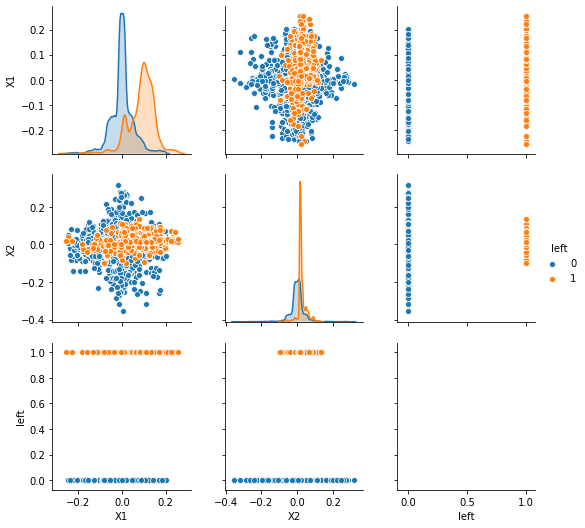

In [21]:
sns.pairplot(data=norm_df[['X1', 'X2', 'left']], hue='left')
plt.show()

In [22]:
norm_df['X4'] = norm_df['X1'] * norm_df['X2']

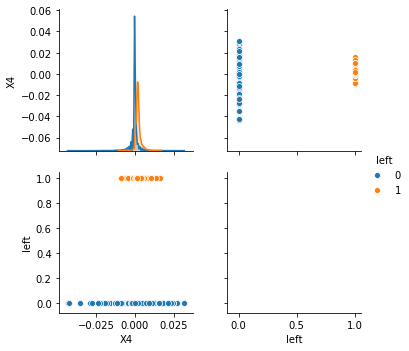

In [23]:
sns.pairplot(data=norm_df[['X4', 'left']], hue='left')

In [24]:
norm_df[norm_df['left']==1].describe()

,left,last_evaluation,number_project,average_montly_hours,time_spend_company,X1,X2,X4
count,3571.0,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,1.0,0.003142,0.010490,0.029761,0.047284,0.090325,0.024609,0.002165
std,0.0,0.308865,0.363633,0.285995,0.122212,0.059396,0.022172,0.001991
min,1.0,-0.415784,-0.360611,-0.350703,-0.187279,-0.255857,-0.100904,-0.009693
25%,1.0,-0.306409,-0.360611,-0.257245,-0.062279,0.057600,0.015226,0.001314
50%,1.0,0.115466,0.039389,0.107241,0.062721,0.099225,0.019513,0.001930
75%,1.0,0.287341,0.439389,0.284812,0.187721,0.127398,0.029781,0.002659
max,1.0,0.443591,0.639389,0.509111,0.312721,0.253656,0.134367,0.016299


In [25]:
norm_df[norm_df['left']==0].describe()

,left,last_evaluation,number_project,average_montly_hours,time_spend_company,X1,X2,X4
count,11428.0,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,0.0,-0.000982,-0.003278,-0.009300,-0.014775,0.002003,-0.000548,0.000010
std,0.0,0.253133,0.195977,0.213471,0.195294,0.052250,0.043511,0.002532
min,0.0,-0.556409,-0.360611,-0.490889,-0.187279,-0.244480,-0.353383,-0.043016
25%,0.0,-0.212659,-0.160611,-0.182478,-0.187279,-0.017686,-0.015992,-0.000285
50%,0.0,-0.009534,0.039389,-0.014254,-0.062279,0.001471,0.000306,0.000002
75%,0.0,0.209216,0.039389,0.172662,0.062721,0.021608,0.015797,0.000324
max,0.0,0.443591,0.439389,0.401634,0.812721,0.200647,0.315023,0.031424


Видно, что графики произведений достаточно хорошо разделены - 50% уволившихся пересекаются примерно с 10% работающих. Можно пробовать учить

### 4.Визуализировать несколько взаимосвязей между переменными.


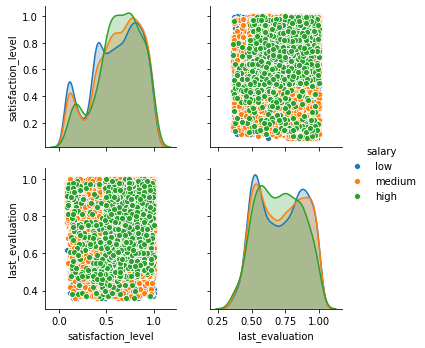

In [26]:
sns.pairplot(data=data[['satisfaction_level', 'last_evaluation', 'salary']], hue='salary')
plt.show()

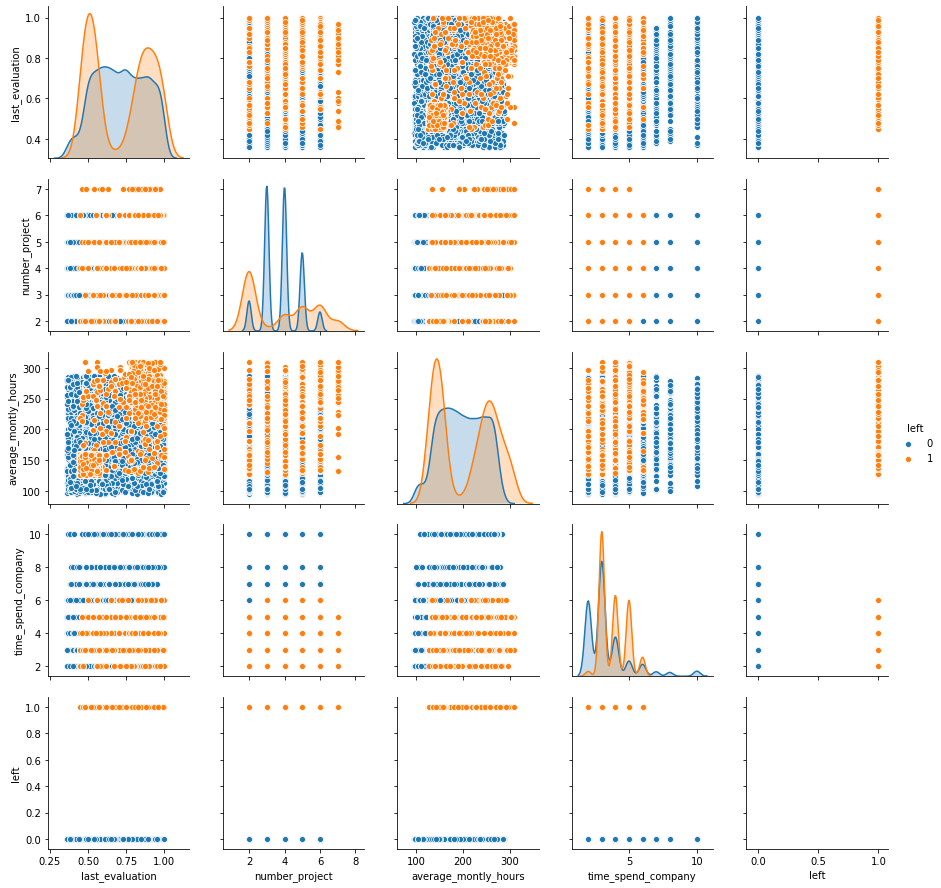

In [27]:
sns.pairplot(data=data[['last_evaluation', 'number_project', 'average_montly_hours','time_spend_company', 'left']], hue='left')
plt.show()

Еще наблюдение для 10-го пункта - распределения людей по параметрам average_montly_hours & last_evaluation очень похожи. Увольняются, в основном, те, кто работает много или работает мало.

### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


In [28]:
stats.ttest_ind(data[data['salary']=='low']['last_evaluation'], data[data['salary']=='medium']['last_evaluation'])

Ttest_indResult(statistic=-0.10362515293909186, pvalue=0.9174683361446355)

In [29]:
stats.ttest_ind(data[data['salary']=='high']['last_evaluation'], data[data['salary']=='medium']['last_evaluation'])

Ttest_indResult(statistic=-2.4760969689840326, pvalue=0.013304137781871797)

То есть, люди со средним и низким уровнем ЗП имеют другие оценки от руководства, чем люди с высокими ЗП. ПРи этом, satisfaction level разный у всех 3х групп

In [30]:
stats.ttest_ind(data[data['salary']=='low']['satisfaction_level'], data[data['salary']=='medium']['satisfaction_level'])

Ttest_indResult(statistic=-4.928592335569859, pvalue=8.378854439781171e-07)

In [31]:
stats.ttest_ind(data[data['salary']=='high']['satisfaction_level'], data[data['salary']=='medium']['satisfaction_level'])

Ttest_indResult(statistic=2.081861364315287, pvalue=0.03738816176204982)

### 6.Рассчитать сколько работников работает в каждом департаменте.


In [32]:
depts = data['sales'].unique()



for cur in depts:
    print(f'В отделе {cur} работает {len(working[working["sales"]==cur])} сотрудников')
          
print(f'Всего работает {len(working)} сотрудников')

В отделе sales работает 3126 сотрудников
В отделе accounting работает 563 сотрудников
В отделе hr работает 524 сотрудников
В отделе technical работает 2023 сотрудников
В отделе support работает 1674 сотрудников
В отделе management работает 539 сотрудников
В отделе IT работает 954 сотрудников
В отделе product_mng работает 704 сотрудников
В отделе marketing работает 655 сотрудников
В отделе RandD работает 666 сотрудников
Всего работает 11428 сотрудников


In [33]:
for cur in depts:
    print(f'В отделе {cur} было {data[data["sales"] == cur]["Work_accident"].sum()} несчастных случаев')
          
print(f'Всего было {data["Work_accident"].sum()} случаев')

В отделе sales было 587 несчастных случаев
В отделе accounting было 96 несчастных случаев
В отделе hr было 89 несчастных случаев
В отделе technical было 381 несчастных случаев
В отделе support было 345 несчастных случаев
В отделе management было 103 несчастных случаев
В отделе IT было 164 несчастных случаев
В отделе product_mng было 132 несчастных случаев
В отделе marketing было 138 несчастных случаев
В отделе RandD было 134 несчастных случаев
Всего было 2169 случаев


Подозреваю, что параметр Work_accident не является именно несчастным случаем, с таким травматизмом компанию давно закрыли бы. Скорее всего, в этом параметре содержится информация о болезнях и т.п., не обязательно связанная с несчастными случаями. Но спросить не у кого.

### 7.Показать распределение сотрудников по зарплатам.


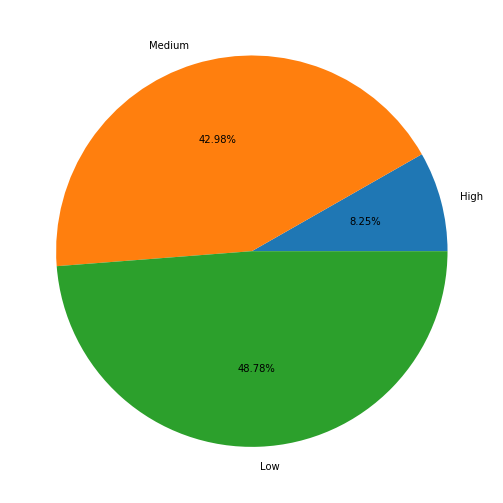

In [34]:
rcParams['figure.figsize'] = 12,9
plt.pie([data['high'].sum(), data['medium'].sum(), data['low'].sum()], labels=['High', 'Medium', 'Low'], autopct='%1.2f%%')
plt.show()

### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.


In [35]:
depts = data['sales'].unique()

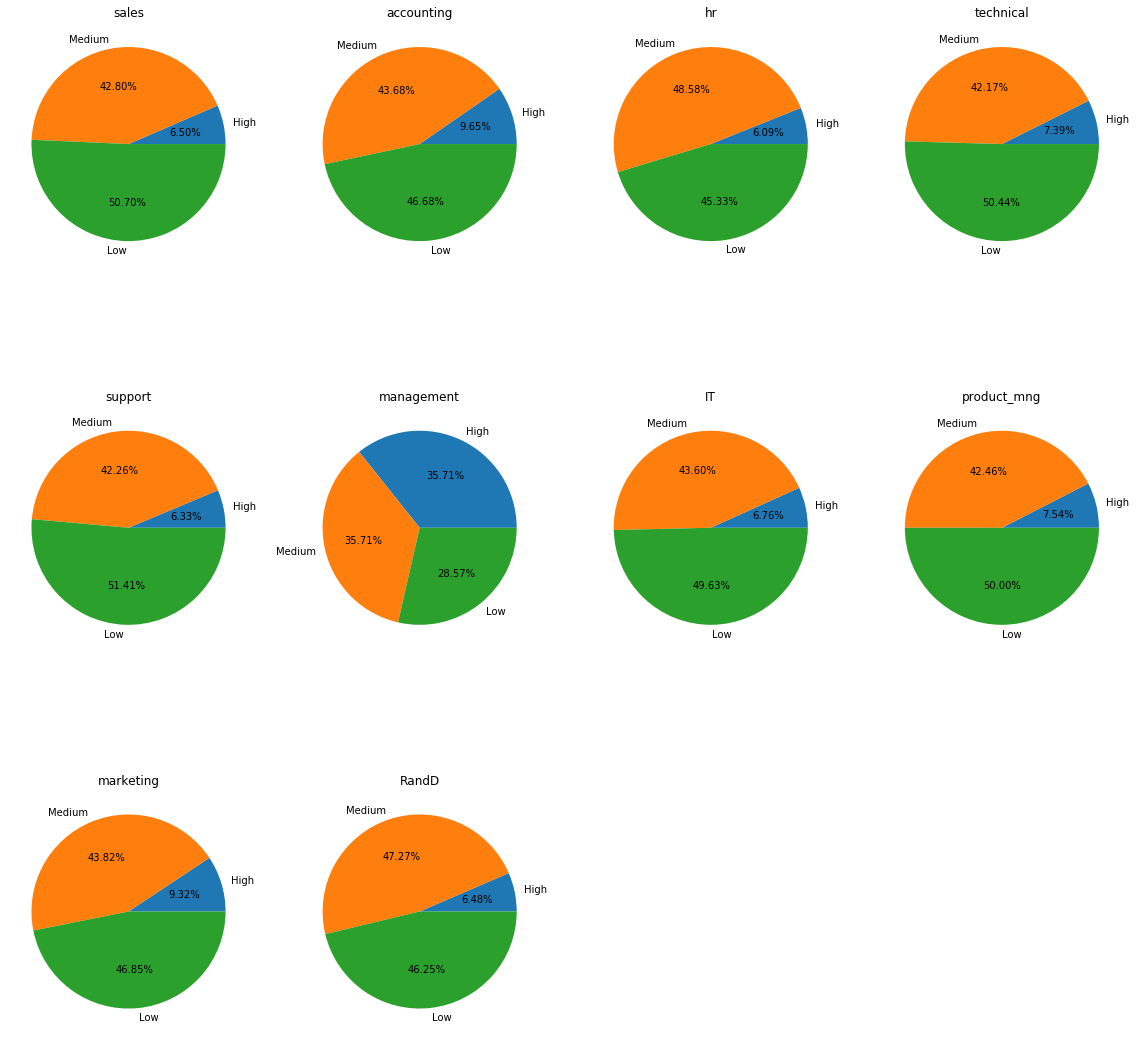

In [36]:
# Все сотрудники
rcParams['figure.figsize'] = 20,20

for cur in range(len(depts)):
    plt.subplot(3, 4, cur+1)
    plt.pie([data[ data['sales'] == depts[cur]]['high'].sum(), data[ data['sales'] == depts[cur]]['medium'].sum(), 
             data[ data['sales'] == depts[cur]]['low'].sum()], 
            labels=['High', 'Medium', 'Low'], autopct='%1.2f%%')
    plt.title(depts[cur])
    
plt.show()

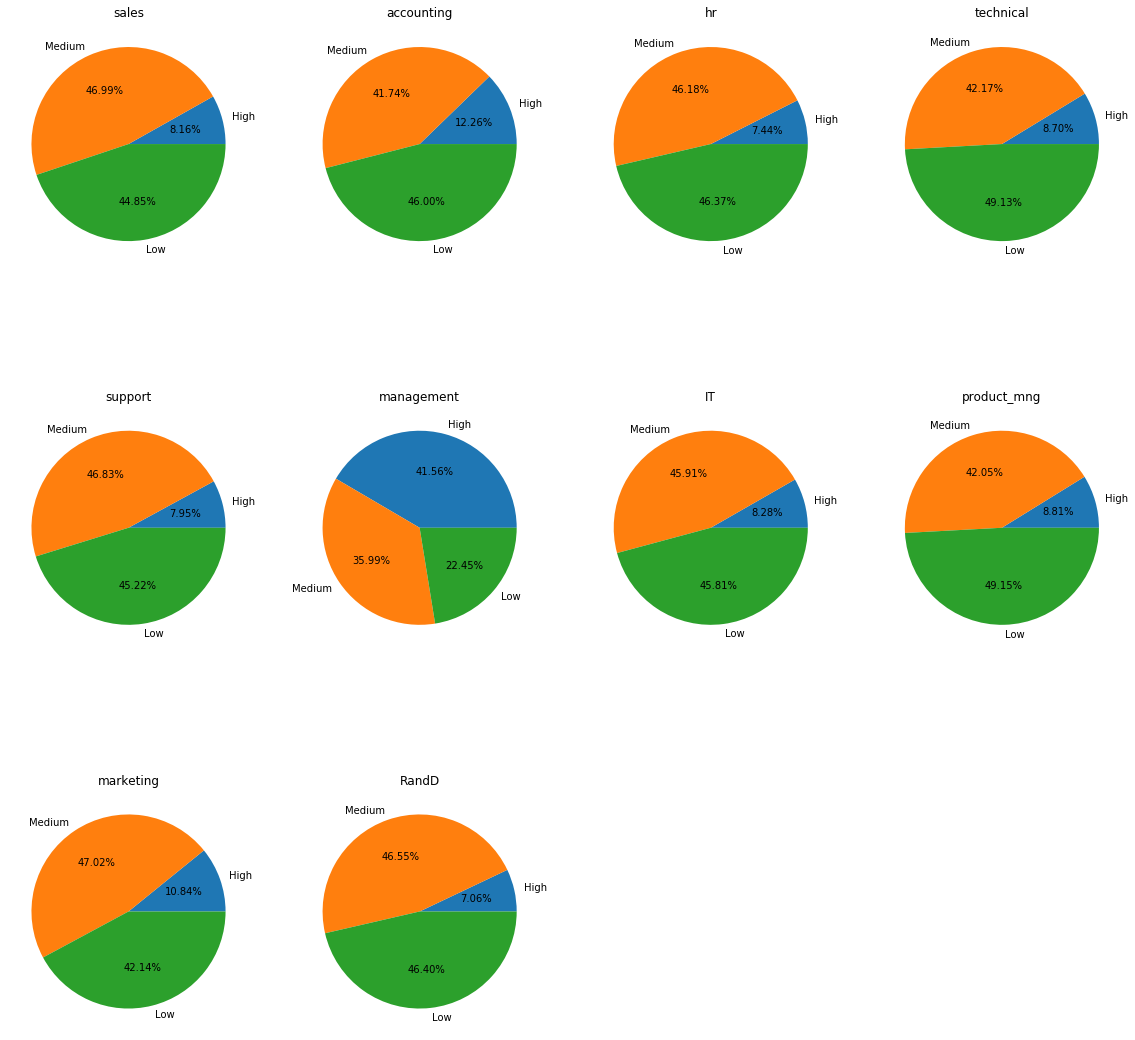

In [37]:
# Работающие
for cur in range(len(depts)):
    plt.subplot(3, 4, cur+1)
    plt.pie([working[ working['sales'] == depts[cur]]['high'].sum(), working[ working['sales'] == depts[cur]]['medium'].sum(), 
             working[ working['sales'] == depts[cur]]['low'].sum()], 
            labels=['High', 'Medium', 'Low'], autopct='%1.2f%%')
    plt.title(depts[cur])
    
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


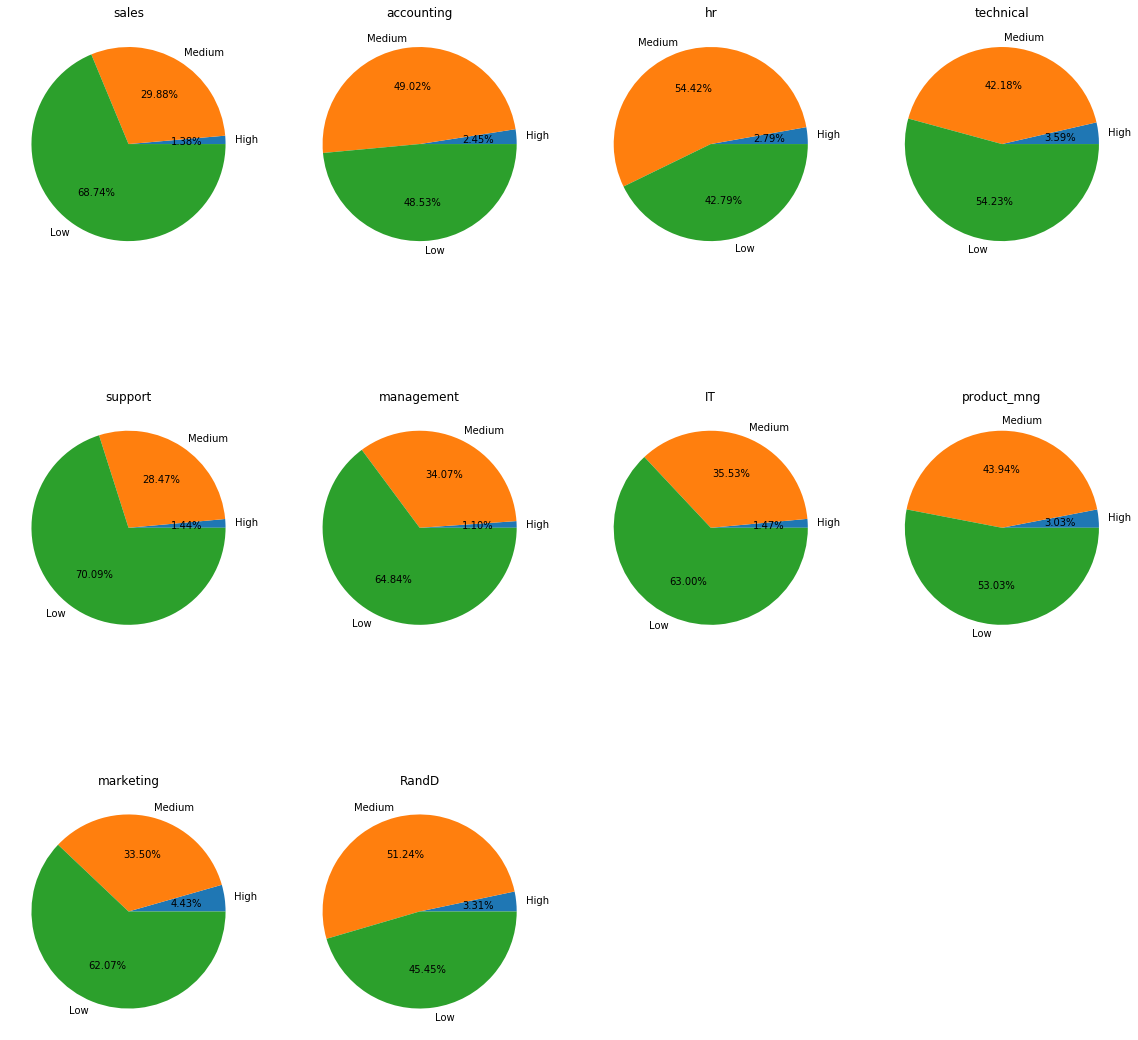

In [38]:
for cur in range(len(depts)):
    plt.subplot(3, 4, cur+1)
    plt.pie([left[ left['sales'] == depts[cur]]['high'].sum(), left[ left['sales'] == depts[cur]]['medium'].sum(), 
             left[ data['sales'] == depts[cur]]['low'].sum()], 
            labels=['High', 'Medium', 'Low'], autopct='%1.2f%%')
    plt.title(depts[cur])
    
plt.show()

Видно, что процентное соотношение высокооплачиваемых сотрудников растет - у текущих работников зарплата High встречается чаще, чем на всем объеме данных и у уволившихся

### 9.Сколько сотрудников покинули компанию.


In [39]:
print(f'Компанию покинуло {data["left"].sum()} сотрудников')

Компанию покинуло 3571 сотрудников


### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.


Пока картинки

Распределение зарплат для работающих и ушедших

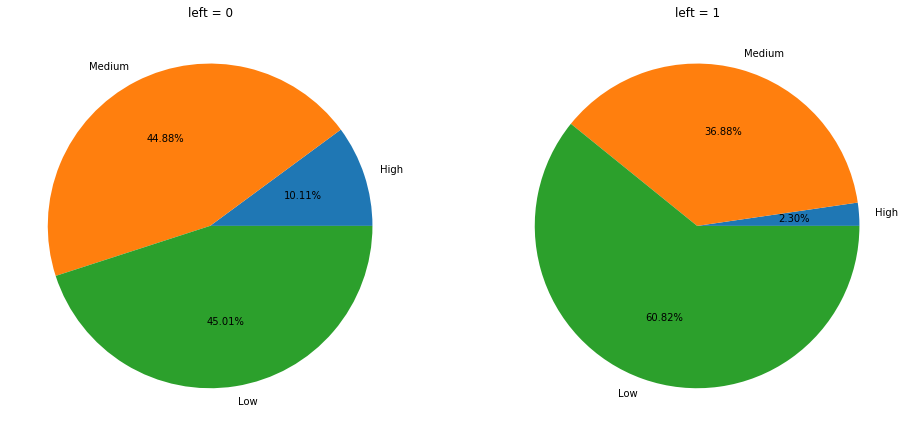

In [40]:
rcParams['figure.figsize'] = 16,8

for cur in range(2):
    plt.subplot(1, 2, cur+1)
    plt.pie([data[ data['left'] == cur]['high'].sum(), data[ data['left'] == cur]['medium'].sum(), 
             data[ data['left'] == cur]['low'].sum()], 
            labels=['High', 'Medium', 'Low'], autopct='%1.2f%%')
    plt.title(f'left = {cur}')
    
plt.show()

Вывод 1: в основном, увольняются сотрудники с низкими зарплатами - не знаю, насколько это значимо, среди низкооплачиваемых сотрудников текучка, обычно, выше.

Как было сказано в пункте 3: У уволившихся наблюдается корреляция между последней оценкой, количеством проектов, количеством часов и общим временем работы в компании. У работающих параметры практически не связаны. Первая и самая простая гипотеза об увольнении - надоело и устал))

В пункте 4 я заметил очень похожее распределение оценки от руководства и часов на работе для уволившихся людей. Эти два параметра достаточно сильно коррелируют для уволившихся людей. Увольняются либо люди, которые проводят много времени на работе и получают хорошие оценки, либо люди, которые мало работают и получают низкие оценки. Первые, возможно, увольняются из-за сложного карьерного роста в компании - за 5 лет повысили только 319 человек. Вторым - надоело работать (данные включают только работников со стажем 2 года и выше).

In [41]:
# Let's try to learn!
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    np.array(data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']]),
    data['left'], test_size=0.3)


# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
model.score(X_test, y_test)

0.9735555555555555

Точность модели - 97,3% - достаточно неплохо

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете